# Programa de detección de formas

La Evidencia de aprendizaje 3 consiste en elaborar un programa que está solicitando la detección y caracterización de diferentes formas. Se usará el lenguaje de programación Python 3.8 para realizar el ejercicio en una Jupyter Notebook, con la ayuda de la siguientes librerías:

* `opencv`: funciones propias de visión computacional y procesamiento de imágenes.
* `matplotlib`: módulos y funciones para graficar.
* `numpy`: librería matemática y de computación numérica.

El objetivo será contar la cantidad de huevos que hay en la foto de una tapa. Como se puede observar, en este caso se cuentan 21. Antes de continuar con el procesamiento de la imagen para posteriormente comprobar que el algoritmo cuente los 21 también, convirtamos la imagen a escala de grises.

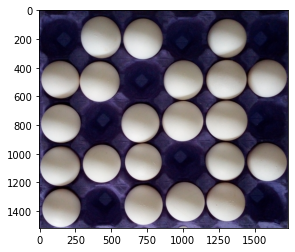

In [1]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

# leer imagen original
image = plt.imread('tapa.jpg')
plt.imshow(image);


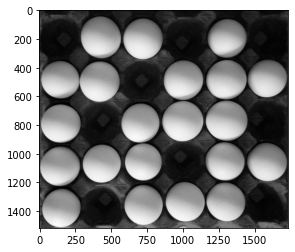

In [2]:
# convertir imagen a escala de grises
grayimg = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
CMAP_GRAY = 'gray'
plt.imshow(grayimg, CMAP_GRAY);

El siguiente paso es detectar los bordes de la imagen, usando el algoritmo de Canny, pero antes habrá que aplicar un filtro a la imagen para eliminar el ruido en los espacios vacíos donde no hay huevos, ya que podrían interferir al detectar bordes y confundirlos con los bordes de los huevos.

Después de detectar los bordes se procederá a dilatarlos, es decir, incrementar el tamaño de las líneas de los bordes para que posteriormente sea más fácil encontrar los contornos de los huevos.

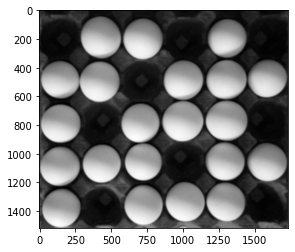

In [3]:
import numpy as np

# aplicar filtro borroso
blurred = cv2.blur(grayimg, (11, 11))
plt.imshow(blurred, CMAP_GRAY);

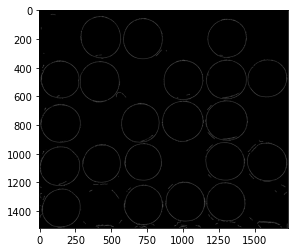

In [4]:
# detectar bordes
edges = cv2.Canny(blurred, 1, 50)
plt.imshow(edges, CMAP_GRAY);

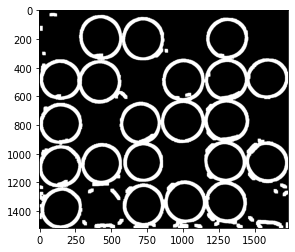

In [5]:
# dilatar bordes detectados
kernel = np.ones((20, 20), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)
plt.imshow(dilated, CMAP_GRAY);

Finalmente, se hará uso de una función de `opencv` la cual encuentra los contornos que hay en una imagen. En este caso, gracias a la dilatación de los bordes detectados, en la imagen final quedan solamente círculos, que son las diferentes formas de los huevos de la imagen.

In [6]:
count, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(count)

21

El algoritmo implementado contó exitosamente la cantidad de huevos en la imagen.